In [59]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# LOAD DATA 
df = pd.read_csv("salary_prediction_data.csv")

df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("jobtitle", "job_title")
    .str.replace("job_title_", "job_title")
)

print("Final Columns Used:", df.columns.tolist())

#  TARGET & FEATURES 

X = df.drop("salary", axis=1)
y = df["salary"]

Final Columns Used: ['education', 'experience', 'location', 'job_title', 'age', 'gender', 'salary']


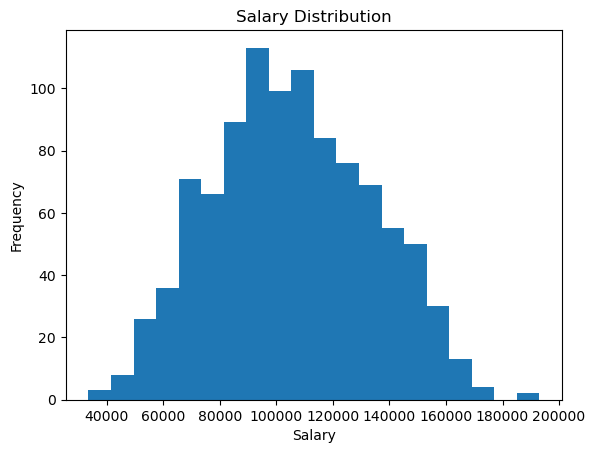

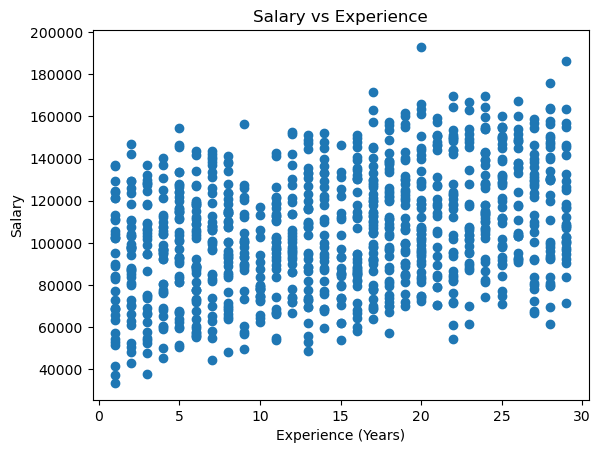

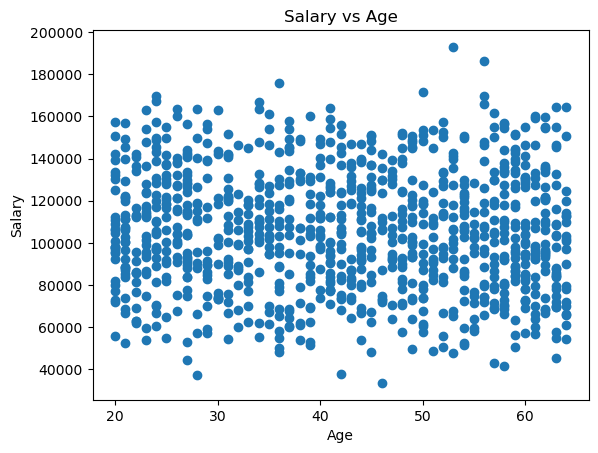

KNN Best R2 Score: 0.821
DecisionTree Best R2 Score: 0.803
RandomForest Best R2 Score: 0.832


In [61]:
# Salary Distribution
plt.figure()
plt.hist(y, bins=20)
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.title("Salary Distribution")
plt.show()

# Salary vs Experience
plt.figure()
plt.scatter(df["experience"], y)
plt.xlabel("Experience (Years)")
plt.ylabel("Salary")
plt.title("Salary vs Experience")
plt.show()

# Salary vs Age
plt.figure()
plt.scatter(df["age"], y)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Salary vs Age")
plt.show()

# FEATURE TYPES 
num_features = ["age", "experience"]
cat_features = ["education", "job_title", "location"]

# PREPROCESSING 
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)

#  MODELS 
models = {
    "KNN": KNeighborsRegressor(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42)
}

params = {
    "KNN": {
        "model__n_neighbors": [3, 5, 7],
        "model__weights": ["uniform", "distance"]
    },
    "DecisionTree": {
        "model__max_depth": [None, 5, 10],
        "model__min_samples_split": [2, 5]
    },
    "RandomForest": {
        "model__n_estimators": [100, 200],
        "model__max_depth": [None, 10]
    }
}

best_model = None
best_score = -np.inf
model_scores = {}

#  TRAIN & TUNE 
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("model", model)
    ])

    grid = GridSearchCV(
        pipeline,
        params[name],
        cv=5,
        scoring="r2",
        n_jobs=-1,
        error_score="raise"
    )

    grid.fit(X, y)

    model_scores[name] = grid.best_score_

    if grid.best_score_ > best_score:
        best_score = grid.best_score_
        best_model = grid.best_estimator_

    print(f"{name} Best R2 Score: {grid.best_score_:.3f}")



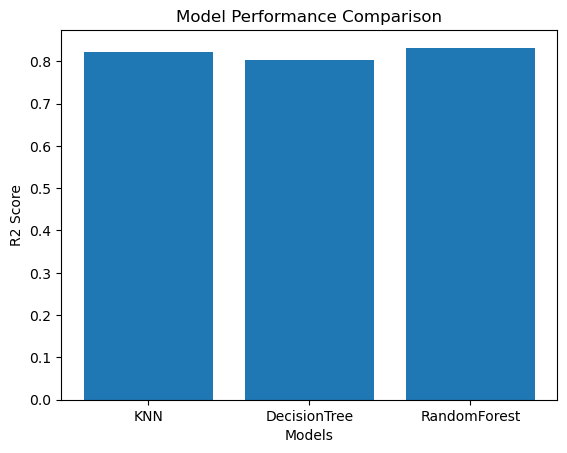

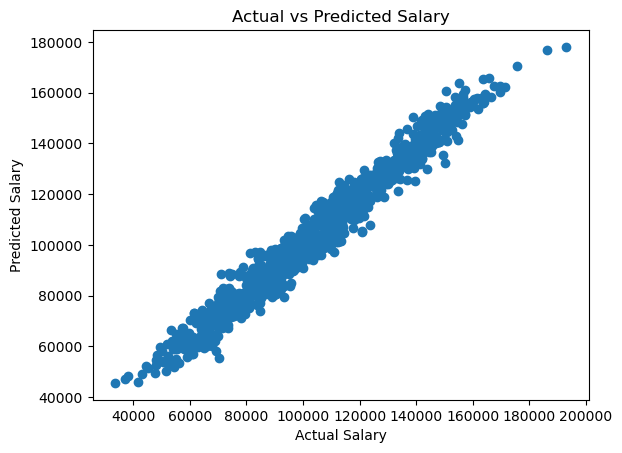

Model trained and saved successfully!


In [62]:
#  MODEL COMPARISON 
plt.figure()
plt.bar(model_scores.keys(), model_scores.values())
plt.xlabel("Models")
plt.ylabel("R2 Score")
plt.title("Model Performance Comparison")
plt.show()

#  ACTUAL vs PREDICTED 
y_pred = best_model.predict(X)

plt.figure()
plt.scatter(y, y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()

#  SAVE MODEL 
with open("salary_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Model trained and saved successfully!")